# Support Vector Machines 


## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Our goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv("wine_fraud.csv")

In [69]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Exploratory Data Analysis

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [ ]:
#We can create a countplot to display the count per category of Legit vs Fraud in the 'quality' column.

<AxesSubplot:xlabel='quality', ylabel='count'>

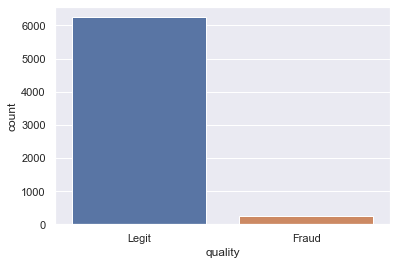

In [6]:
sns.countplot(data = df, x='quality')

We can see that the target values are imbalanced

In [ ]:
#We can also use a countplot to check if there's a difference between the two types of wine in this dataset(red and white)
#when it comes to fraud

<AxesSubplot:xlabel='type', ylabel='count'>

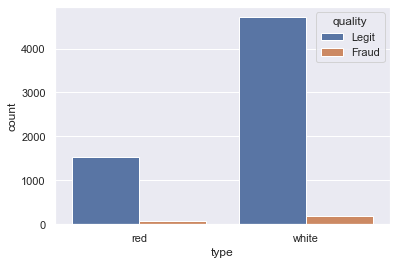

In [9]:
sns.countplot(data = df, x='type', hue='quality')

It could be seenfrom the countplot above that white wines have way higher legit wines than their red counterparts, as well as having more fraudulent wines than red wines.

In [ ]:
#We can also calculate the percentage of fraudulent red and white wines.

In [13]:
df.groupby('type')['quality'].count()

type
red      1599
white    4898
Name: quality, dtype: int64

In [14]:
reds = df[df['type']=='red']
whites = df[df['type']=='white']

In [16]:
print("Percentage of fraud in red wines is: ")
print(100*(len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in red wines is: 
3.9399624765478425


In [17]:
print("Percentage of fraud in white wines is: ")
print(100*(len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in white wines is: 
3.7362188648427925


In [ ]:
#We can also check the correlations pf all the features with the target(quality) column.

In [70]:
df['quality'] = df['quality'].map({'Fraud': 0, 'Legit': 1})

In [71]:
df.corr()['quality'].sort_values()

volatile acidity       -0.151228
chlorides              -0.034499
fixed acidity          -0.021794
pH                     -0.020107
density                -0.016351
sulphates               0.034046
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
quality                 1.000000
Name: quality, dtype: float64

In [ ]:
#To better visualize this, we can plot out a barplot showing the various correlations of the features with the target variable

In [80]:
corr = df.corr()['quality'].sort_values()

In [82]:
corr = corr.drop('quality')

In [85]:
corr_ser = pd.Series(index=corr.index,data=corr.values)

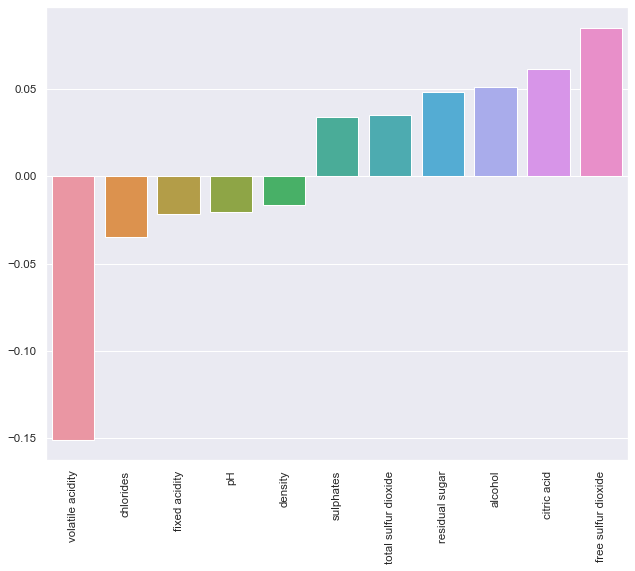

In [92]:
plt.figure(figsize=(10,8), dpi=75)
sns.barplot(x=corr_ser.index, y=corr_ser.values)
plt.xticks(rotation=90);

In [ ]:
#A heatmap and a clustermap can be created to show the relationships between the variables

<AxesSubplot:>

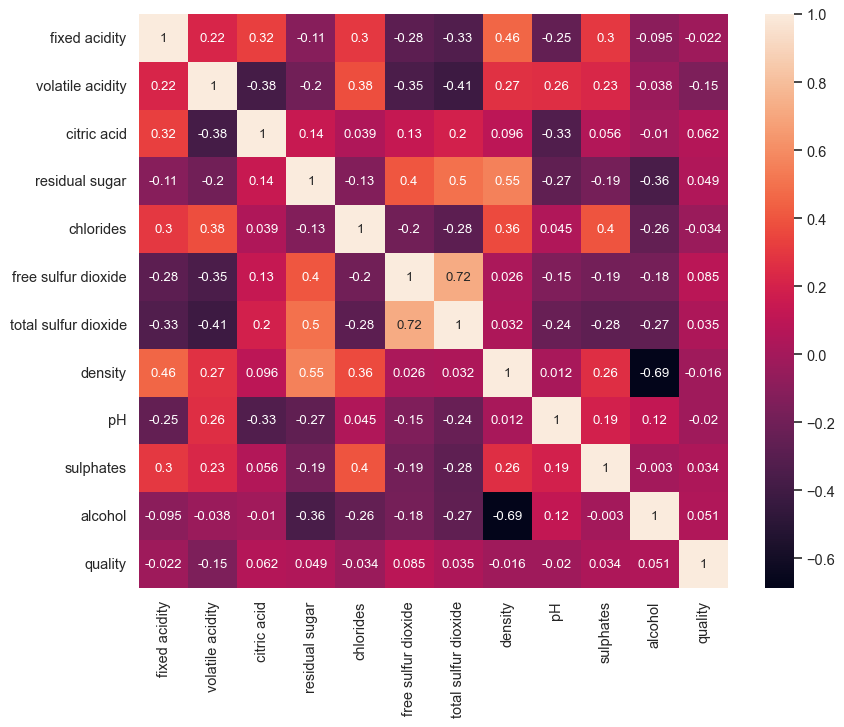

In [91]:
plt.figure(figsize=(10,8), dpi=95)
sns.heatmap(df.corr(), annot=True)

<Figure size 1000x800 with 0 Axes>

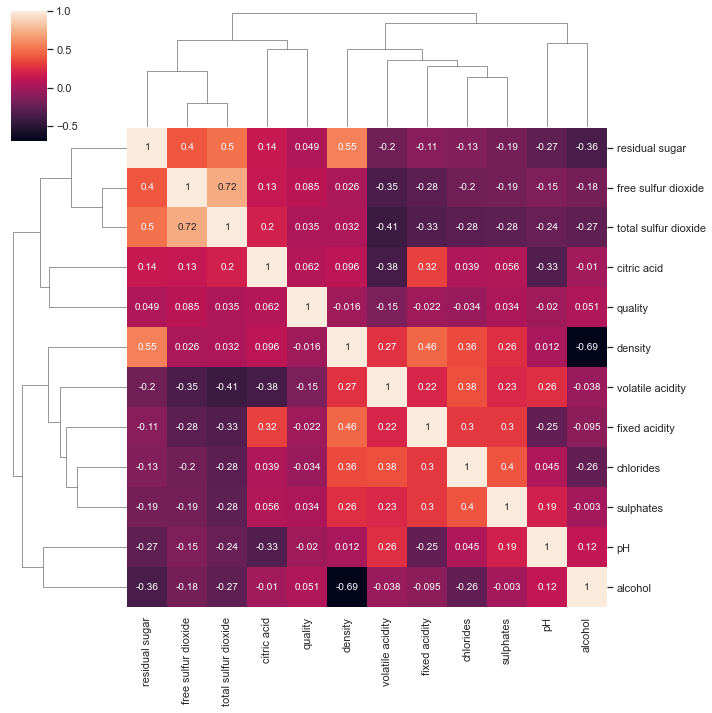

In [79]:
plt.figure(figsize=(10,8), dpi=100)
sns.clustermap(df.corr(), annot=True)

### Data Preprocessing

In [ ]:
#We will convert the categorical column, 'type' from a string based column to dummy variables

In [96]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [97]:
X = df.drop(['quality'], axis=1)

In [98]:
y = df['quality']

### Train | Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Scaling the data

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
scaled_X_train = scaler.fit_transform(X_train)

In [104]:
scaled_X_test = scaler.transform(X_test)

### SVC model

In [105]:
from sklearn.svm import SVC

In [2]:
#Since the two classes(Legit and Fraud) are imbalanced, we would change the 'class_weight' parameter in our SVC from None
#to 'balanced' in order to automatically adjust weights inversely proportional to class frequencies. This would alleviate 
#the effect of the imbalance of the classes.

In [109]:
base_svc = SVC(class_weight='balanced')

In [110]:
base_svc.fit(scaled_X_train, y_train)

SVC(class_weight='balanced')

In [111]:
preds = base_svc.predict(scaled_X_test)

In [3]:
#Now, we evaluate or model's performance using accuracy, precision, recall and the confusion matrix

In [112]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [113]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.16      0.63      0.25        27
           1       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [114]:
confusion_matrix(y_test, preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [ ]:
#In order to get the best C and gamma parameters for our model, we will use GridSearchCV

In [126]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto']}

In [120]:
from sklearn.model_selection import GridSearchCV

In [127]:
svc = SVC(class_weight='balanced')
grid = GridSearchCV(svc, param_grid)

In [128]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [129]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [131]:
grid_pred = grid.predict(scaled_X_test)

In [132]:
confusion_matrix(y_test, grid_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [133]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.16      0.63      0.25        27
           1       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



After looking at the final results of the model's performance, it would be safe to say that using chemcical analysis ALONE to check for wine fraud is not recommended. This is because in most cases, the chemical composition of both the real and fake wines would be very similar making it difficult for a machine learning algorithm to predict which is which based on chemical analysis alone. 

The precision and recall scores for the fraudulent(0) values are really low, and from the confusion matrix, it could be seen that out of 27 fraudulent values, the model was only able to predict 17 correctly. This is a very poor result as the main goal of the project was to be able to detect fraudulent wines to a very high degree of accuracy which was obviously not achieved.

It would be highly recommended that the feature set be expanded to not only consist of chemical analysis results but also other features such as historical analysis of the wines, locations of purchase, etc. This would greatly improve the performance of the algorithm, thus, yielding more accurate predictions.